<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass5/bdm/Truth%20Archive/Assignment_5_Truth_Archive_featurewiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5: Feature Engineering (Featurewiz) by Truth Archive

## Group members:
| No | Name |  MatricNo |
| -----: |  ------ | :-----: |
|1        |Hazem Fenneer   |MCS231019         |
| 2       |Shivanesh       |MCS231014         |
|   3     |Nur Shahirah    |MEC233005         |
|     4   |Mustafa         |MCS212012         |

##Introduction

The project at hand revolves around the task of feature engineering used car prices, employing a dataset named "used-car-price-predictions." The primary objective is to develop a features that can be used to develop a machine learning model. To achieve this, the Featurewiz library is utilized for comprehensive feature engineering, a critical step in optimizing the dataset for model training.
### Featurewiz
Featurewiz proves instrumental in automating and enhancing the feature engineering process. It enables the creation of insightful variables, fostering a deeper understanding of the dataset's nuances. By leveraging Featurewiz, the project aims to extract meaningful information from the available features, contributing to the model's predictive power.

**Pros:**

1. **Automation:** Featurewiz automates several aspects of the feature engineering process, saving time and effort in manually crafting new features.

2. **Comprehensive Feature Generation:** It systematically generates a diverse set of features, including interactions and transformations, providing a wide array of potential variables for model training.

3. **Ease of Use:** Featurewiz is designed to be user-friendly, making it accessible to both beginners and experienced data scientists. Its simplicity allows for quick integration into the feature engineering pipeline.

4. **Reduced Manual Intervention:** By automating feature generation, Featurewiz minimizes the need for extensive manual intervention in the initial stages of data preprocessing.

5. **Insightful Variable Creation:** It facilitates the creation of meaningful variables, aiding in the extraction of valuable insights from the dataset.

**Cons:**

1. **Black Box Nature:** The automated nature of Featurewiz might be considered a drawback for those who prefer a more transparent approach to feature engineering. Some users may find it challenging to interpret the specific transformations applied.

2. **Limited Customization:** While Featurewiz offers a range of automated feature engineering options, it may not cover every specific feature transformation that a user might want. This limitation could be a drawback for projects requiring highly tailored feature engineering.

3. **Dependency on Data Quality:** Featurewiz's effectiveness is contingent on the quality and characteristics of the input dataset. If the dataset has significant missing values or outliers, it might impact the quality of the automated feature engineering.

4. **Potential Overfitting:** The generation of a large number of features can potentially lead to overfitting, especially if the dataset is not large enough. Users need to be cautious about the relevance of the features generated and their impact on model generalization.

5. **Resource Intensive:** In datasets with a large number of features or a substantial amount of data, the automated feature engineering process might become resource-intensive.

##Downlading the dataset

To set up the project environment in Google Colab, mount Google Drive, configure Kaggle access, and download the car_listings Data for further analysis.

In [50]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


The Kaggle API requires authentication to download datasets. By setting the Kaggle configuration directory to a specific location in Google Drive, the code ensures that Kaggle API keys and configurations are stored in a persistent location.

In [51]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Assignment 2"

Thic command uses the Kaggle CLI to download the dataset titled "used-car-price-predictions" by the user "harikrishnareddyb."

In [52]:
!kaggle datasets download -d harikrishnareddyb/used-car-price-predictions

 29% 5.00M/17.2M [00:00<00:00, 37.6MB/s]
100% 17.2M/17.2M [00:00<00:00, 83.0MB/s]


Now to extracts the contents of the downloaded zip file. After extraction, the original zip file is removed to avoid redundancy in the project directory.

In [53]:
!unzip \*.zip  && rm *.zip

Archive:  used-car-price-predictions.zip
replace true_car_listings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Last in this step is to check if the csv files are available

In [54]:
!ls

gdrive	sample_data  true_car_listings.csv  used-car-price-predictions.zip


### Data Preparation and Cleaning


Data preparation and cleaning are foundational steps in the data analysis process, focused on refining raw datasets for meaningful insights. This involves handling missing values, eliminating duplicates, and addressing outliers to ensure data accuracy.

First we import the library we plan to use in this project

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import sklearn
import warnings

Load the dataset to a datafram

In [56]:
df = pd.read_csv('/content/true_car_listings.csv')


Now Some preperations

First size

In [57]:
df.size

6816976

Now, we have a preview of the head of the dataset

In [58]:
df.head(5)

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


Dsiplay the columns

In [59]:
df.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


Ensure no null values are available

In [61]:
df.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

Ensure that the dublicate values are removed and so are empty rows of data

In [62]:
df = df.drop_duplicates()
df = df.dropna()

In [63]:
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [64]:
df.describe()

,Price,Year,Mileage
count,852092.000000,852092.000000,8.520920e+05
mean,21464.323952,2013.289097,5.250825e+04
std,13596.350808,3.415016,4.198932e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218700e+04
max,499500.000000,2018.000000,2.856196e+06


##EDA

EDA involves employing statistical and graphical techniques to uncover insights, detect anomalies, and formulate hypotheses about the underlying data distribution.

Visualize the distribution of the target variable (Price)

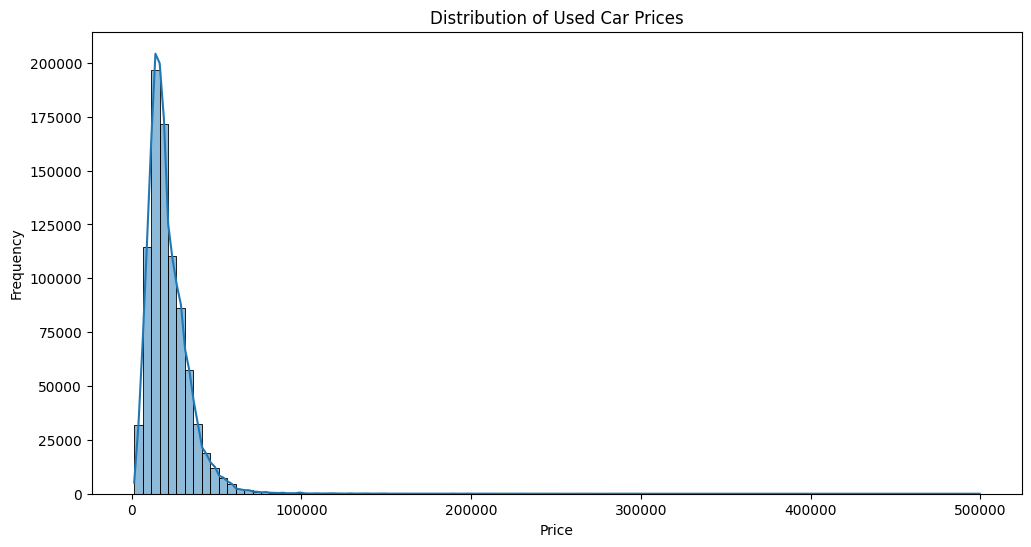

In [65]:

plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=100, kde=True)
plt.title('Distribution of Used Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

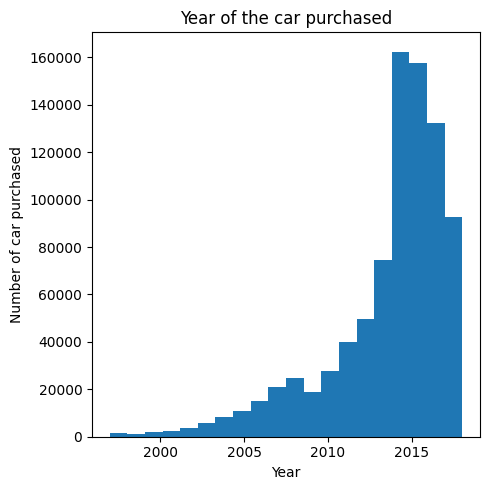

In [66]:
data = df['Year']

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(data,bins=20)
ax.set_title("Year of the car purchased")
ax.set_xlabel('Year')
ax.set_ylabel('Number of car purchased')
ax.grid(False)
plt.tight_layout()
plt.show()

Visualize which city have the most car purchased

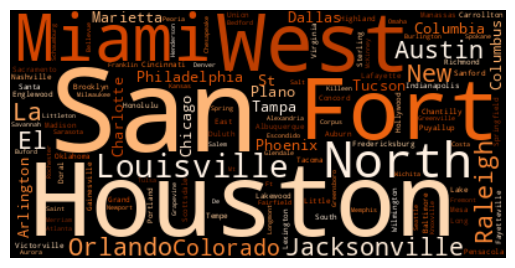

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = " ".join(city.split()[0] for city in df.City)
word_cloud = WordCloud(colormap='Oranges',collocations = False, background_color = 'black').generate(text)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##Featurewiz

Featurewiz is a powerful Python library designed to streamline the process of feature engineering for machine learning tasks. Developed with simplicity and efficiency in mind, Featurewiz automates the identification, selection, and creation of relevant features, allowing data scientists and machine learning practitioners to focus on model development rather than spending excessive time on feature engineering.

First we install featurewiz

In [68]:
!pip install featurewiz

Then we import the library needed for feature engineer

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from featurewiz import featurewiz as FW
from sklearn.model_selection import cross_val_score,train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline
from featurewiz import featurewiz
import featurewiz as fw

First we will need to set up data for machine learning by defining a target variable ('Price') and splitting the dataset into features (X) and the target variable (y).

In [70]:
# Specify the target variable
target_variable = 'Price'
# Split the data into features (X) and target variable (y)
X = df.drop(target_variable, axis=1)
y = df[target_variable]


in this code we will utilize the train_test_split function to divide the dataset into training and testing sets.

In [71]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Checking the X_train information

In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681673 entries, 140026 to 121973
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Year     681673 non-null  int64 
 1   Mileage  681673 non-null  int64 
 2   City     681673 non-null  object
 3   State    681673 non-null  object
 4   Vin      681673 non-null  object
 5   Make     681673 non-null  object
 6   Model    681673 non-null  object
dtypes: int64(2), object(5)
memory usage: 41.6+ MB


In [73]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170419 entries, 227743 to 565358
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Year     170419 non-null  int64 
 1   Mileage  170419 non-null  int64 
 2   City     170419 non-null  object
 3   State    170419 non-null  object
 4   Vin      170419 non-null  object
 5   Make     170419 non-null  object
 6   Model    170419 non-null  object
dtypes: int64(2), object(5)
memory usage: 10.4+ MB


Now we need to combine the training features (X_train) and their corresponding target variable (y_train) into a new DataFrame named train_df using the concat function. The result is a unified dataset ready for training machine learning models.

In [74]:
# Combine X_train and y_train into a new training dataset
train_df = pd.concat([X_train, y_train], axis=1)

Lastly we will emply the featurewiz library on the training dataset.

In [75]:
# Use featurewiz on the training dataset
featurewiz(train_df, target=target_variable)

featurewiz has selected 0.8 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Regression problem ####
    Loaded train data. Shape = (681673, 8)
#### Single_Label Regression problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Regression problem ####
    loading a sequential sample of 10000 rows into pandas for EDA
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
        3 variable(s) to be removed since ID or low-information variables
    	variables removed = ['Vin', 'City', 'Model']
train data shape before dropping 2 columns =

(['Mileage', 'Make'],
         Mileage  Make  Price
 140026     9386     9  27288
 314322     6787    15  33495
 748294    47438    54  10288
 31432     60777     5   9991
 347271   239516    15  11997
 ...         ...   ...    ...
 259208    32181    15  17987
 365868    82056    17  27780
 131947    31735     9  23300
 671185    51111    41  20495
 121973    17244     9  18500
 
 [681673 rows x 3 columns])

### Data Feature

First we will calculate the age of a car based on the 'Year' column in the dataset by subtracting the manufacturing year from the current year. Additionally, it extracts the month and season information from the 'Year' column, assuming a 3-month season (each season corresponds to a quarter of the year). The results are stored in new columns 'Car_Age', 'Month', and 'Season'

In [76]:
# Calculate car age
X['Car_Age'] = pd.datetime.now().year - X['Year']

# Extract month or season
X['Month'] = pd.to_datetime(df['Year'], format='%Y').dt.month
X['Season'] = X['Month'] // 4


This code extracts the manufacturer information from the 'Vin' column and creates a new column named 'Manufacturer'

In [77]:
# Extract manufacturer from Vin
X['Manufacturer'] = X['Vin'].str[:3]


Utilizes the StandardScaler from the scikit-learn library to standardize the 'Mileage' feature. Standardization involves transforming the data to have a mean of 0 and a standard deviation of 1, which is often beneficial for certain machine learning algorithms.

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X['Mileage_Scaled'] = scaler.fit_transform(X[['Mileage']])


Createing a new feature 'Year_Mileage' by multiplying the 'Year' column with the 'Mileage' column.

In [79]:
X['Year_Mileage'] = X['Year'] * X['Mileage']


Lastly we will perform several feature engineering tasks

In [80]:
# Interaction feature: Year divided by Mileage
X['Year_Divided_By_Mileage'] = X['Year'] / (X['Mileage'] + 1)

# Extract the length of the VIN
X['Vin_Length'] = X['Vin'].apply(len)

# Feature representing whether the car is old or not (binary)
X['Old_Car'] = (X['Car_Age'] > 10).astype(int)

# Feature representing whether the car has high mileage or not (binary)
X['High_Mileage'] = (X['Mileage'] > X['Mileage'].median()).astype(int)

# Feature representing the interaction between Car_Age and Mileage
X['Car_Age_Mileage'] = X['Car_Age'] * X['Mileage']

# Drop unnecessary columns
X = X.drop(['Vin'], axis=1)

In [81]:
X.head()

,Year,Mileage,City,State,Make,Model,Car_Age,Month,Season,Manufacturer,Mileage_Scaled,Year_Mileage,Year_Divided_By_Mileage,Vin_Length,Old_Car,High_Mileage,Car_Age_Mileage
0,2014,35725,El Paso,TX,Acura,ILX6-Speed,9,1,0,19V,-0.399703,71950150,0.056374,17,0,0,321525
1,2013,19606,Long Island City,NY,Acura,ILX5-Speed,10,1,0,19V,-0.783587,39466878,0.102667,17,0,0,196060
2,2013,48851,El Paso,TX,Acura,ILX6-Speed,10,1,0,19V,-0.087100,98337063,0.041206,17,0,1,488510
3,2014,39922,Windsor,CO,Acura,ILX5-Speed,9,1,0,19V,-0.299749,80402908,0.050447,17,0,0,359298
4,2016,22142,Lindon,UT,Acura,ILXAutomatic,7,1,0,19U,-0.723190,44638272,0.091045,17,0,0,154994


### [X] visulaization

In this section, we will visualize the new datafram X with its new features

Vsualize the correlation matrix of the features

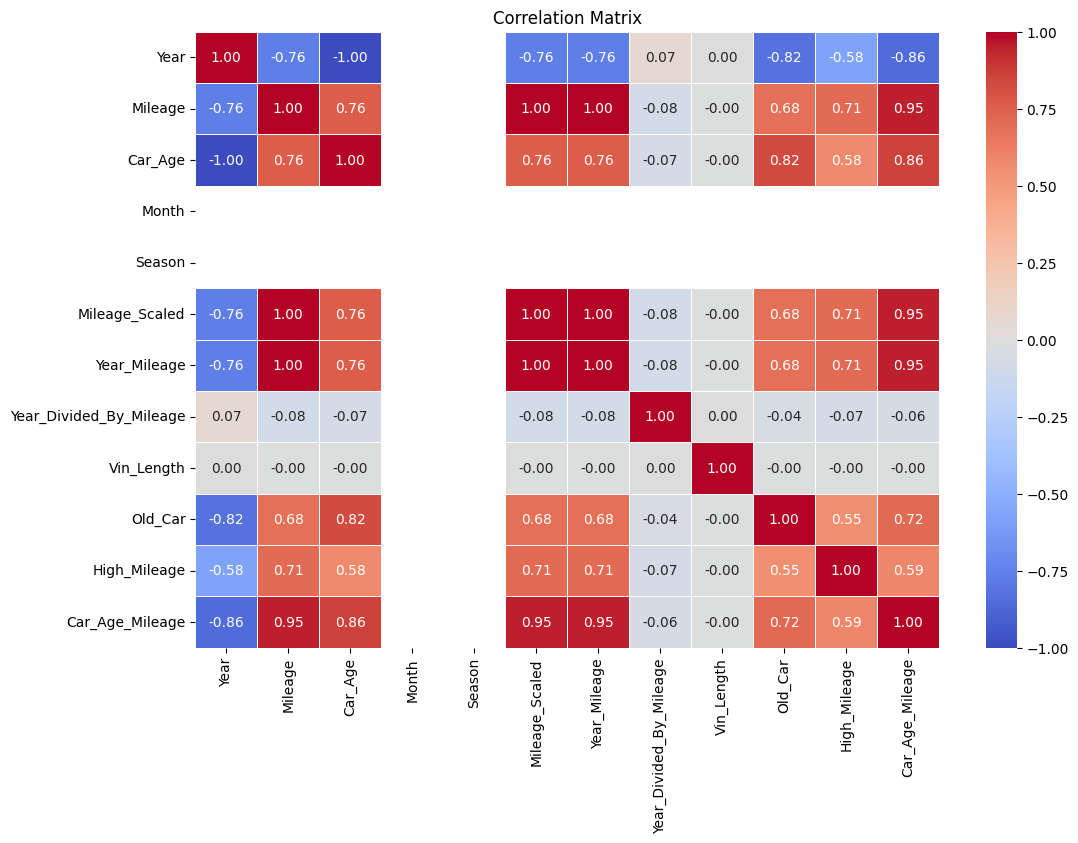

In [82]:
# Compute the correlation matrix
correlation_matrix = X.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


A distribution plot (histogram with a kernel density estimate) for the 'Mileage' feature

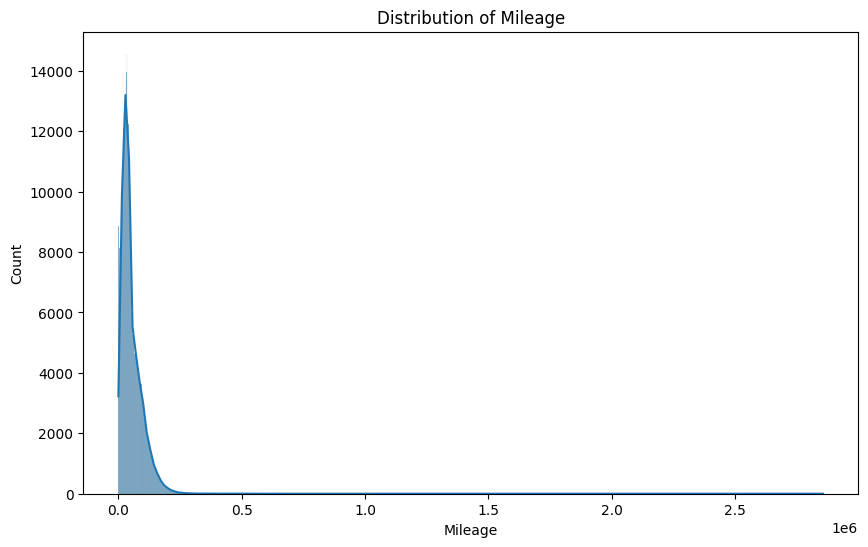

In [83]:
# Distribution plot for Mileage
plt.figure(figsize=(10, 6))
sns.histplot(X['Mileage'], kde=True)
plt.title("Distribution of Mileage")
plt.xlabel("Mileage")
plt.show()


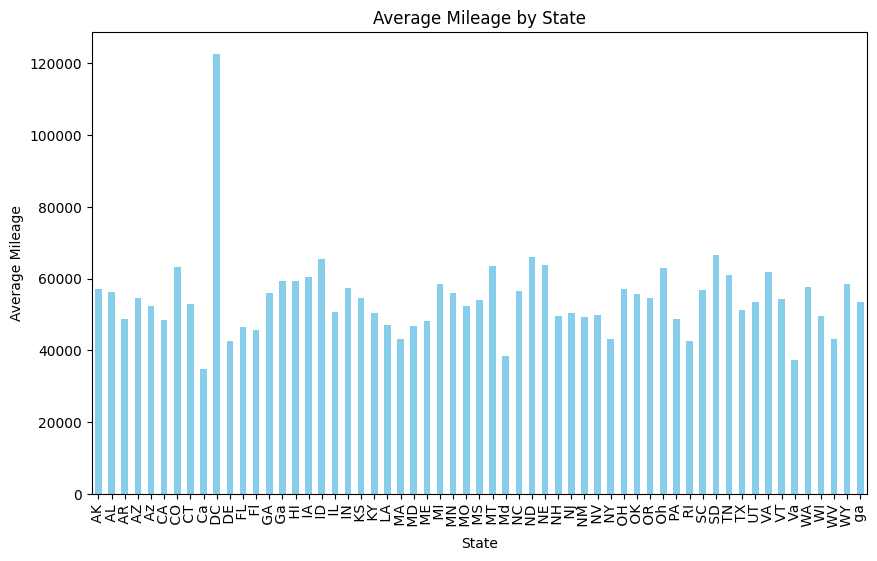

In [84]:
average_mileage_by_state = X.groupby('State')['Mileage'].mean()

plt.figure(figsize=(10, 6))
average_mileage_by_state.plot(kind='bar', color='skyblue')
plt.title('Average Mileage by State')
plt.xlabel('State')
plt.ylabel('Average Mileage')
plt.show()


Calculate the average mileage for each state based on the 'Mileage' column

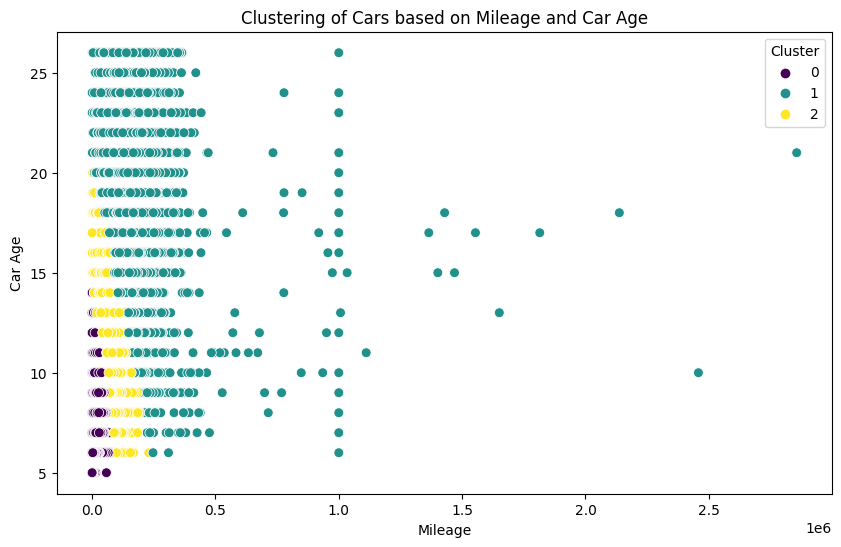

In [85]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features_for_clustering = X[['Mileage', 'Car_Age']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
X['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Car_Age', hue='Cluster', data=X, palette='viridis', s=50)
plt.title("Clustering of Cars based on Mileage and Car Age")
plt.xlabel("Mileage")
plt.ylabel("Car Age")
plt.show()


Here we will performs an Analysis of Variance (ANOVA) test to assess whether there is a statistically significant difference in mileage between different states.

In [86]:
from scipy.stats import f_oneway

# Select relevant columns for the test
states = X['State'].unique()
state_groups = [X[X['State'] == state]['Mileage'] for state in states]

# Perform ANOVA
f_statistic, p_value = f_oneway(*state_groups)

print("ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpret the results based on the p-value
if p_value < 0.05:
    print("The difference in mileage between states is statistically significant.")
else:
    print("There is no significant difference in mileage between states.")


ANOVA Results:
F-statistic: 236.47756967444542
P-value: 0.0
The difference in mileage between states is statistically significant.


##Conclusion

In conclusion, the feature engineering process on the "used-car-price-predictions" dataset involves creating informative variables and exploring relationships within the data. The analysis extends to regional differences, specifically examining mileage across states. The ANOVA test aids in determining the statistical significance of these regional differences. Overall, these steps contribute to a comprehensive understanding of the dataset and lay a solid foundation for training machine learning models for used car price predictions.
Moreover, Featurewiz offers a valuable automated solution for feature engineering with several advantages, but users should carefully consider its limitations, particularly in terms of interpretability and customization, depending on the specific requirements of their projects.